# Chapter 8. Exploratory data analysis
## Notebook for R

### 8.1 Simple exploratory data analysis

In [82]:
library(tidyverse)
library(magrittr)
library(glue)
#Load clean data
#Data preparation in cleaning_eurobarometer_r.ipynb
url='http://cssbook.net/d/eurobarometer_nov_2017.csv'
d2= read_csv(url, col_names = TRUE)
print(glue("Shape of my original data: {nrow(d2)} x {ncol(d2)}"))
print("Variables:")
colnames(d2)

Parsed with column specification:
cols(
  survey = col_character(),
  uniqid = col_double(),
  date = col_character(),
  country = col_character(),
  marital_status = col_character(),
  educational = col_character(),
  gender = col_character(),
  age = col_double(),
  occupation = col_character(),
  type_community = col_character(),
  household_composition = col_character(),
  support_refugees = col_character(),
  support_migrants = col_character(),
  date_n = col_double(),
  support_refugees_n = col_double(),
  support_migrants_n = col_double(),
  educational_n = col_double()
)



Shape of my original data: 33193 x 17
[1] "Variables:"


[1] "survey"                "uniqid"                "date"                 
 [4] "country"               "marital_status"        "educational"          
 [7] "gender"                "age"                   "occupation"           
[10] "type_community"        "household_composition" "support_refugees"     
[13] "support_migrants"      "date_n"                "support_refugees_n"   
[16] "support_migrants_n"    "educational_n"

In [83]:
table_gender = d2 %>%
  group_by(gender) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency))   
table_gender

gender,frequency,rel_freq
<chr>,<int>,<dbl>
Man,15477,0.466273
Woman,17716,0.533727


In [84]:
table_support = d2 %>%
  group_by(support_refugees) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency)) 
table_support

support_refugees,frequency,rel_freq
<chr>,<int>,<dbl>
Tend to agree,12695,0.3824602
Tend to disagree,5391,0.1624138
Totally agree,4957,0.1493387
Totally disagree,3574,0.1076733
NA,6576,0.1981141


In [85]:
print(glue("Number of missing values in the variable support_refugees: {(sum(is.na(d2$support_refugees)))}"))

d2 = d2 %>% drop_na()
print(glue("Shape of my data without missing values {dim(d2)[1]} x {dim(d2)[2]}"))

Number of missing values in the variable support_refugees: 6576
Shape of my data without missing values 23448 x 17


In [86]:
print("Crosstab gender and support_refugees:")
crosstab_gender_support = d2%>%
  group_by(gender, support_refugees)%>%
  summarise(n=n())%>%
  spread(gender, n)  
crosstab_gender_support

print("Summary statistics for group of cases:")
summary_statistics = d2%>%
  group_by(support_refugees, gender)%>%
  summarise(mean_age=mean(age, na.rm = TRUE))%>%
  spread(gender, mean_age)   
summary_statistics

[1] "Crosstab gender and support_refugees:"


support_refugees,Man,Woman
<chr>,<int>,<int>
Tend to agree,5067,5931
Tend to disagree,2176,2692
Totally agree,2118,2178
Totally disagree,1524,1762


[1] "Summary statistics for group of cases:"


support_refugees,Man,Woman
<chr>,<dbl>,<dbl>
Tend to agree,54.07302,53.37380
Tend to disagree,52.81985,52.65676
Totally agree,53.73890,52.42195
Totally disagree,52.36811,53.20375


### 8.2 Visualizing data

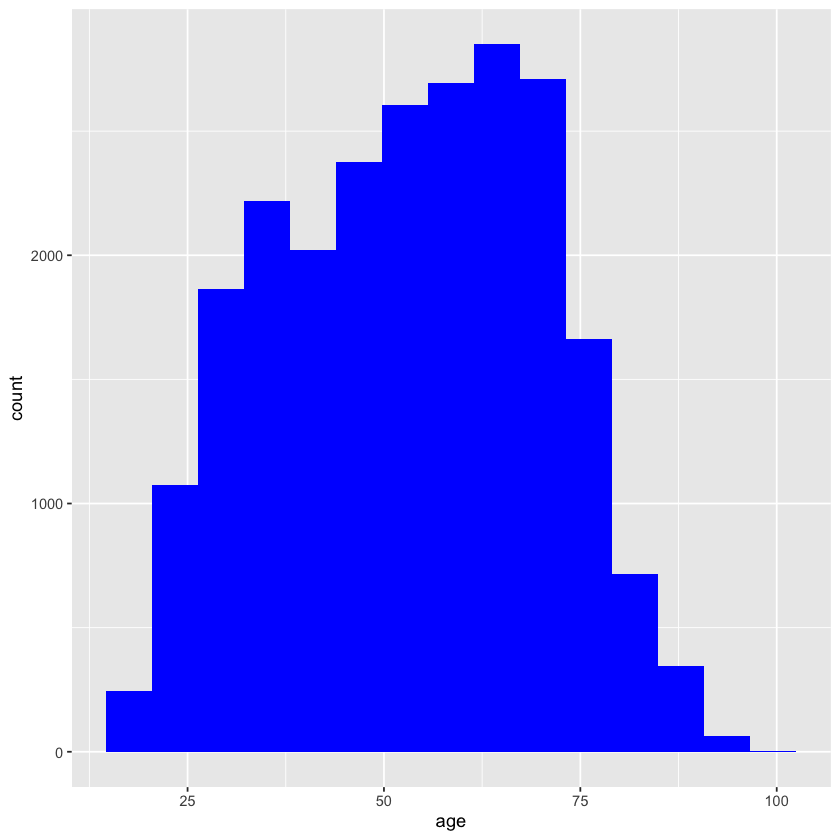

In [87]:
ggplot (data=d2) +
  geom_histogram(mapping = aes(x= age), bins = 15, fill=I("blue"))

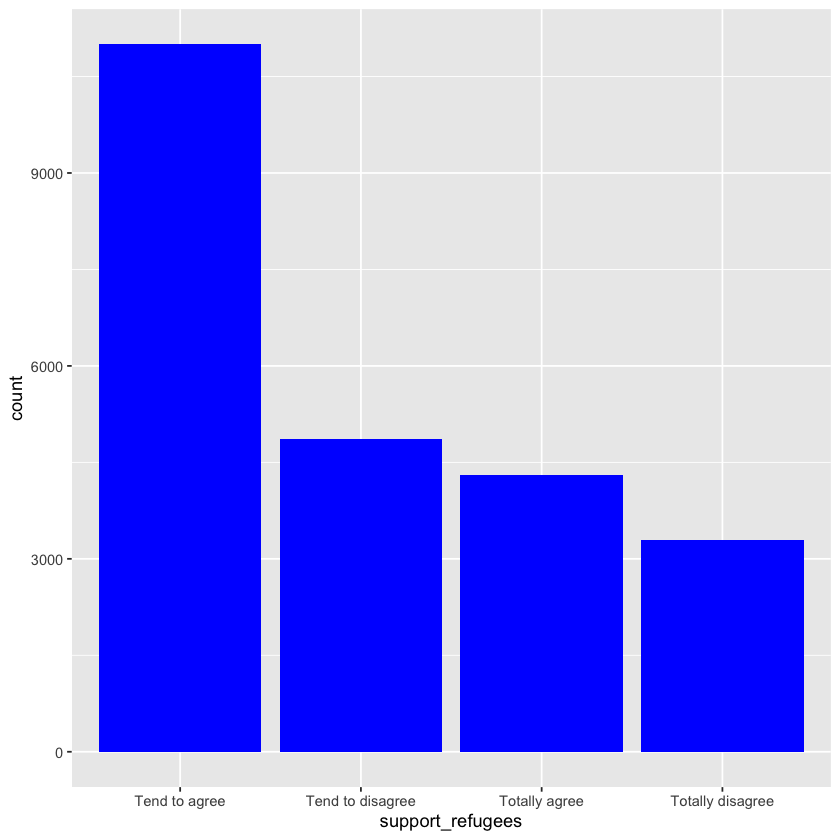

In [88]:
ggplot (data=d2) +
  geom_bar(mapping = aes(x= support_refugees), fill=I("blue"))

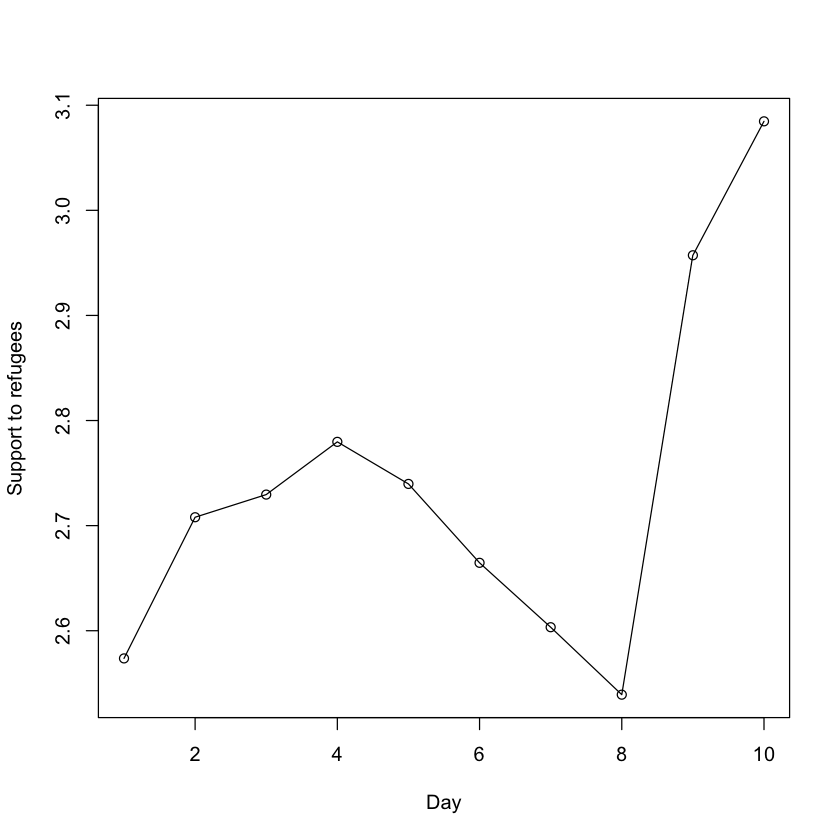

In [89]:

mean_support_refugees_by_day = d2%>%
  group_by(date_n)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE))

plot(mean_support_refugees_by_day$mean_support_refugees,type = "o", xlab="Day", ylab="Support to refugees")


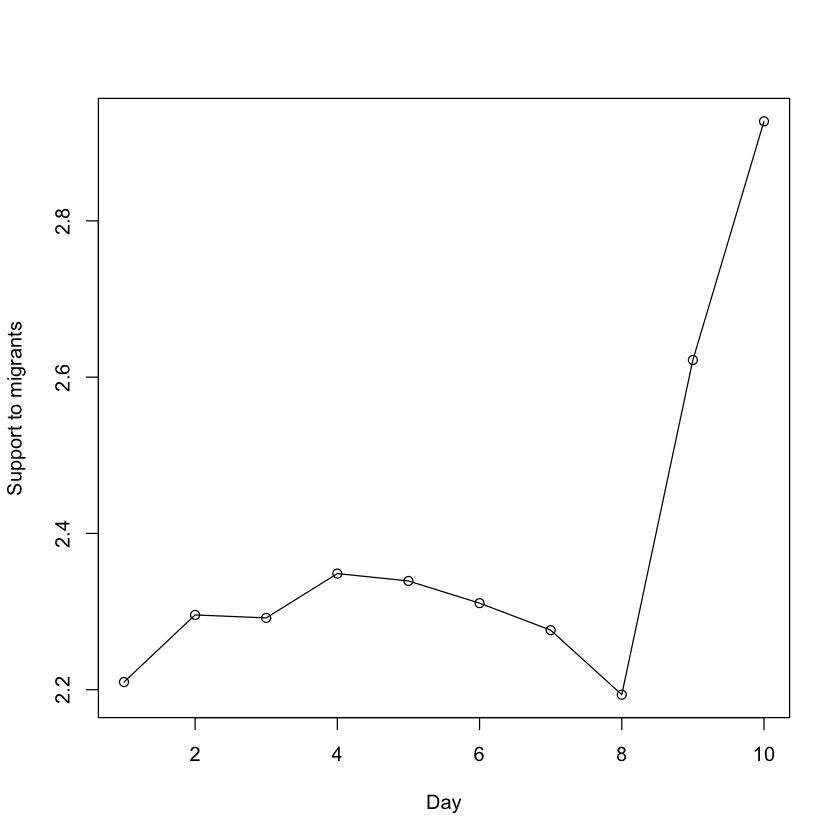

In [90]:
mean_support_migrants_by_day = d2%>%
  group_by(date_n)%>%
  summarise(mean_support_migrants=mean(support_migrants_n, na.rm = TRUE))

plot(mean_support_migrants_by_day$mean_support_migrants,type = "o", xlab="Day", ylab="Support to migrants")

In [91]:
#Combine the figures using function par()
#par(mfrow=c(1,2)) #An alternative function would be layout()
#plot(mean_support_refugees_by_day$mean_support_refugees,type = "o", xlab="Day", ylab="Support to refugees")
#plot(mean_support_migrants_by_day$mean_support_migrants,type = "o", xlab="Day", ylab="Support to migrants")

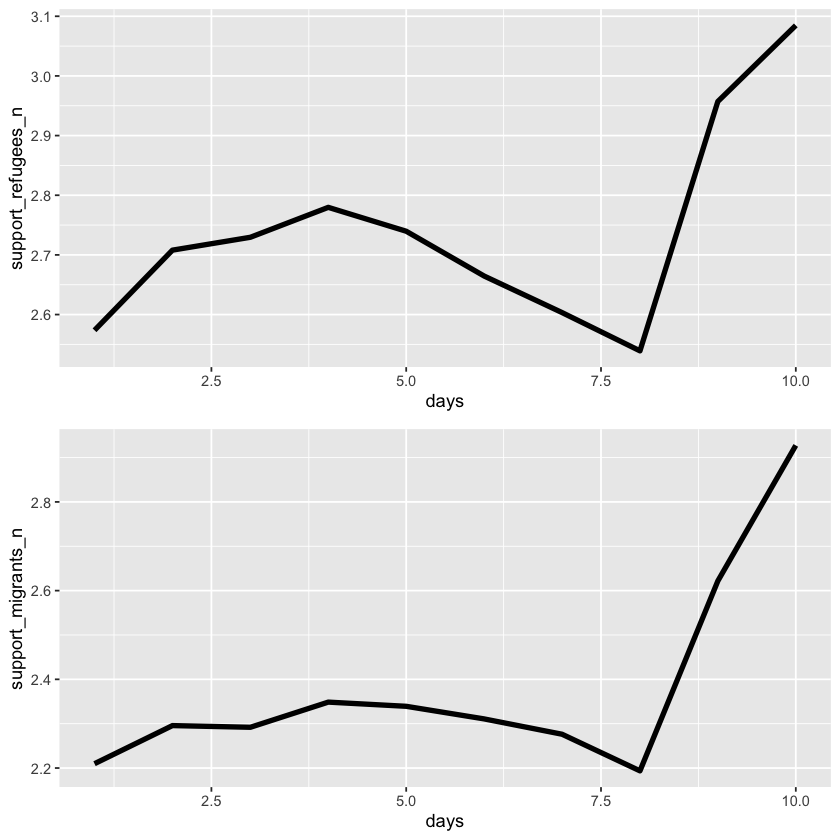

In [92]:
#First we need to create a data frame
days <- c(1:10)
supports <- as.data.frame(cbind(mean_support_refugees_by_day$mean_support_refugees,mean_support_migrants_by_day$mean_support_migrants, days))
supports = supports %>% rename (support_refugees_n = V1, support_migrants_n = V2)
                    
g1 = ggplot(supports, aes(x = days)) +
  geom_line(aes(y = support_refugees_n), size = 1.5)
g2 = ggplot(supports, aes(x = days)) +
  geom_line(aes(y = support_migrants_n), size = 1.5)


#Combine ggplot2 graphs using gridExtra
require(gridExtra)
grid.arrange(g1, g2, ncol=1)

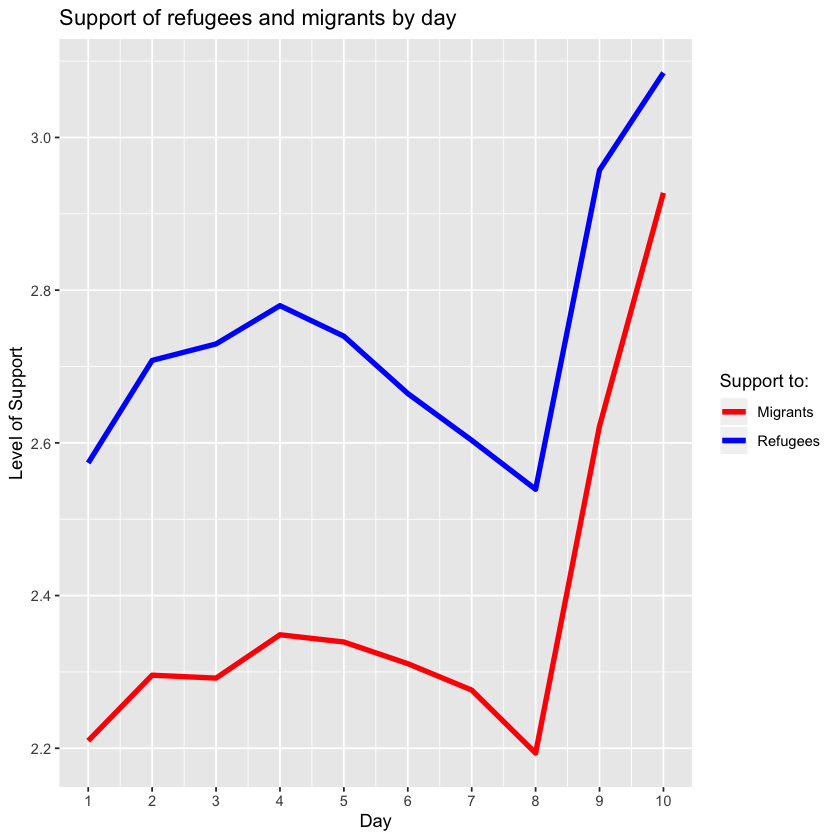

In [93]:
colors <- c("Refugees" = "blue", "Migrants" = "red")
ggplot(supports, aes(x = days)) +
  geom_line(aes(y = support_refugees_n,color ="Refugees"), size = 1.5) +
  geom_line(aes(y = support_migrants_n,color ="Migrants"), size = 1.5)+
  labs(title = "Support of refugees and migrants by day", x = "Day", y = "Level of Support", color = "Support to:") +
  scale_color_manual(values = colors) +
  scale_x_continuous(breaks = seq(from = 1, to = 10, by = 1))

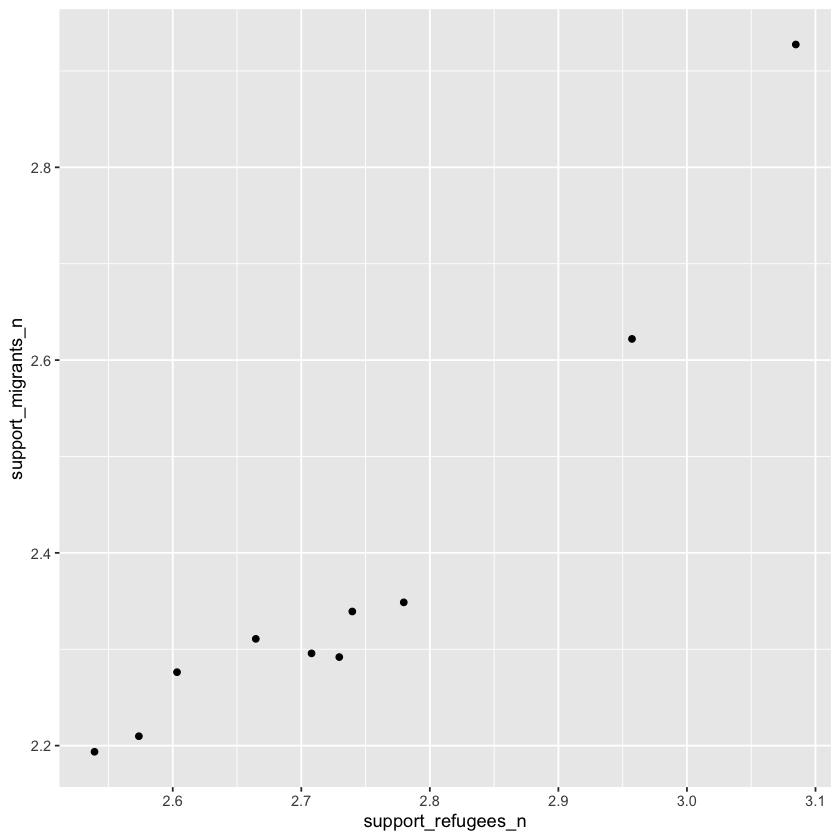

In [94]:
ggplot(supports, aes(x=support_refugees_n, y= support_migrants_n))+
  geom_point()

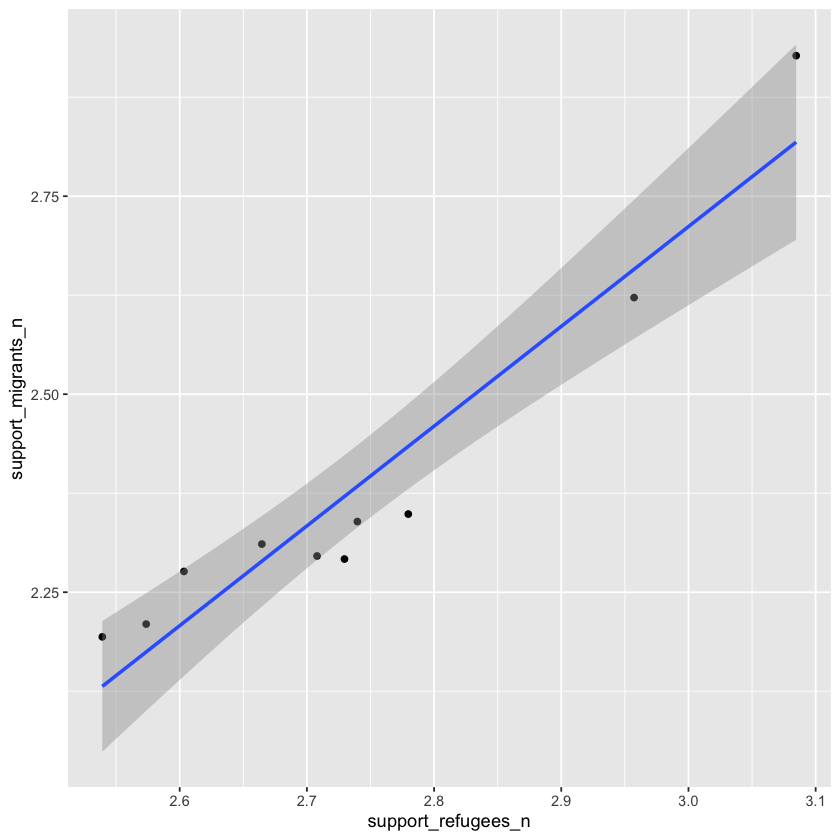

In [95]:
ggplot(supports, aes(x=support_refugees_n, y= support_migrants_n))+
  geom_point()+
  geom_smooth(method = lm)

In [96]:
print(cor(supports$support_refugees_n, supports$support_migrants_n, method = "pearson"))

[1] 0.9541243


In [97]:
pivot_data= d2 %>% select (gender, country, support_refugees_n)
pivot_data = pivot_data %>% mutate(country=factor(country,levels=rev(sort(unique(country))))) 
pivot_data= group_by(pivot_data, country, gender) 
pivot_data = summarise(pivot_data, score = mean(support_refugees_n))

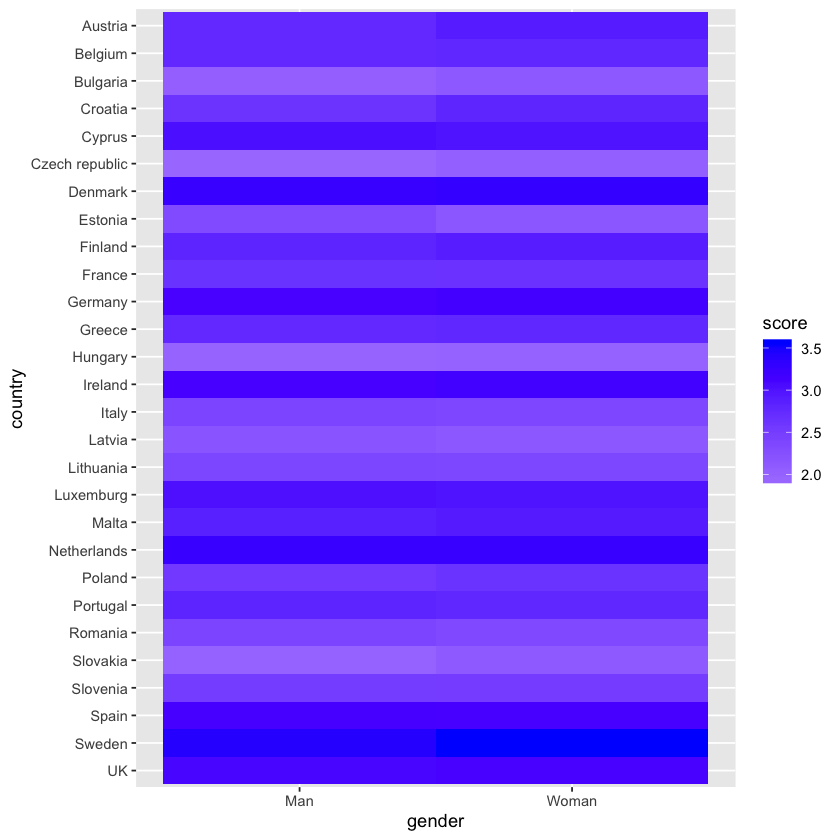

In [98]:
ggplot(pivot_data, aes(x = gender, y = country, fill = score)) + geom_tile()+
  scale_fill_gradient2(low="white", high="blue", guide="colorbar")

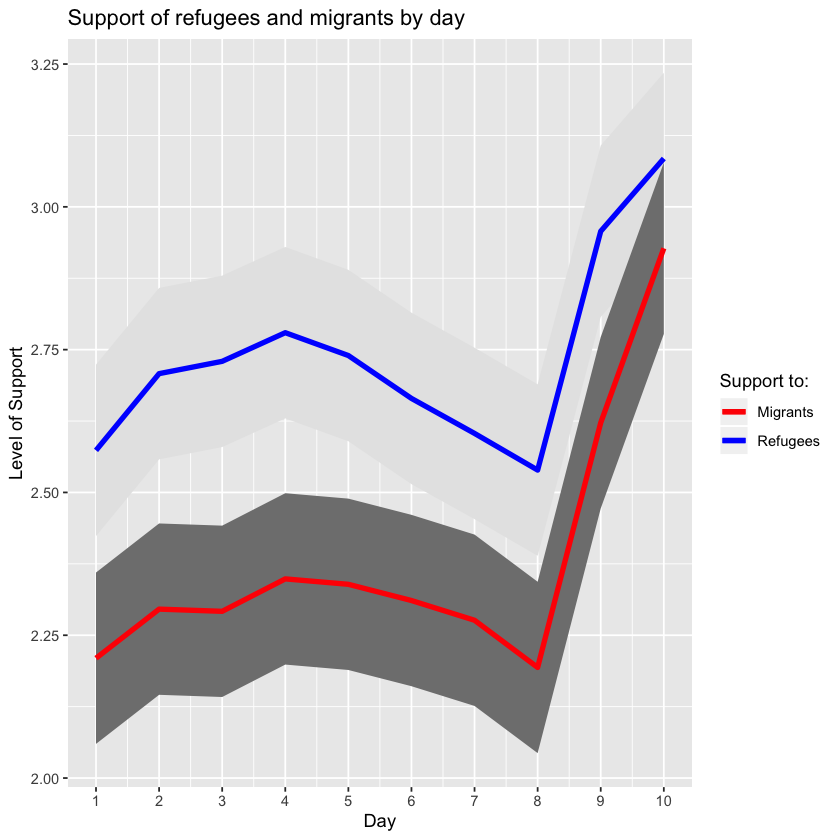

In [99]:
colors <- c("Refugees" = "blue", "Migrants" = "red")
ggplot(supports, aes(x = days)) +
  geom_ribbon(aes(ymin = support_refugees_n - 0.15, ymax = support_refugees_n + 0.15), fill = "grey90") +
  geom_line(aes(y = support_refugees_n,color ="Refugees"), size = 1.5) +
  geom_ribbon(aes(ymin = support_migrants_n - 0.15, ymax = support_migrants_n + 0.15), fill = "grey50") +
  geom_line(aes(y = support_migrants_n,color ="Migrants"), size = 1.5)+
  labs(title = "Support of refugees and migrants by day", x = "Day", y = "Level of Support", color = "Support to:") +
  scale_color_manual(values = colors) +
  scale_x_continuous(breaks = seq(from = 1, to = 10, by = 1))

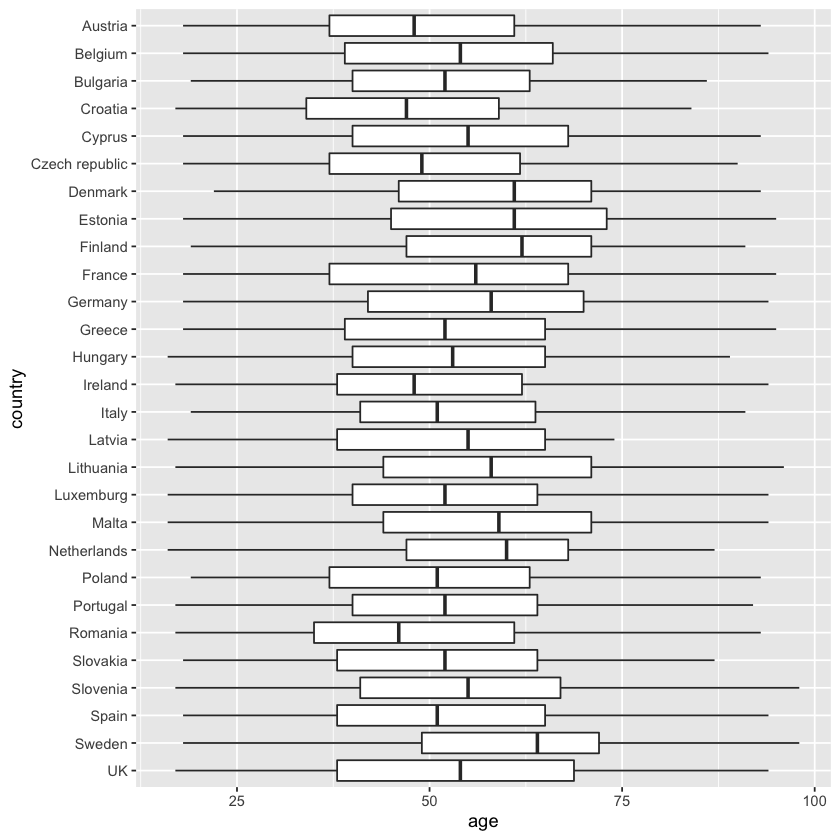

In [100]:
d2 = d2 %>% mutate(country=factor(country,levels=rev(sort(unique(country))))) #order the countries
ggplot(data = d2, mapping= aes(x=country, y=age))+
  geom_boxplot()+
  coord_flip() #We rotate the graph for a better visualization of country labels

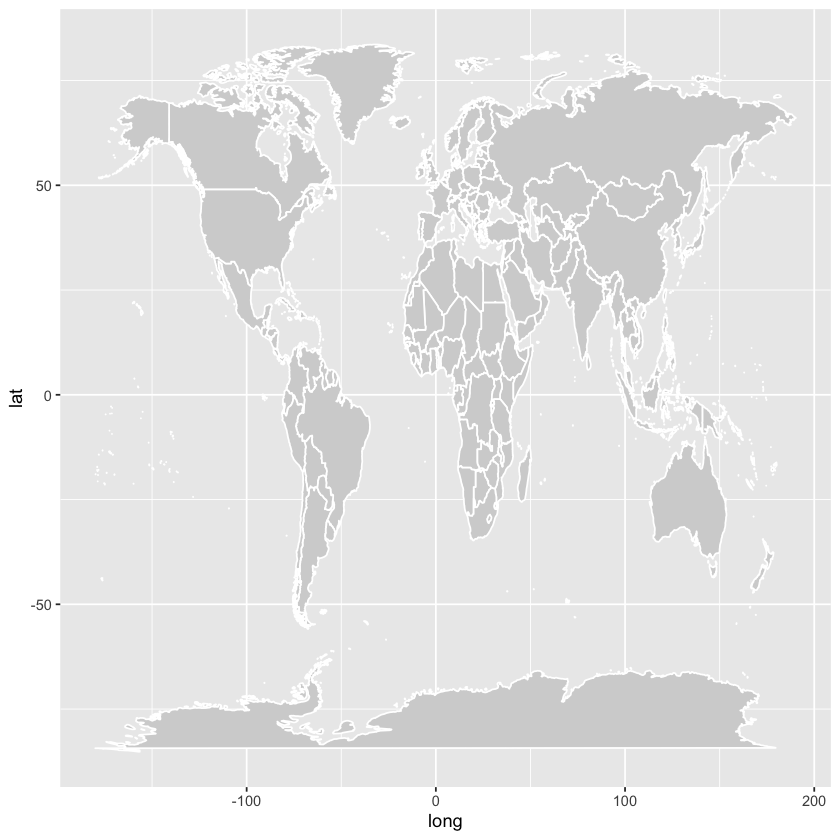

In [101]:
library(maps)

#Generate dataframe with average level of support to refugees by country
mean_support_refugees_by_country = d2%>%
  group_by(country)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE))

supports_country <- as.data.frame(cbind(mean_support_refugees_by_country))

#Load a world map and plot it
world_map = map_data("world")

ggplot(world_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="lightgray", colour = "white")

In [102]:
some.eu.countries = c(
  "Portugal", "Spain", "France", "Germany",
  "Austria", "Belgium", "UK", "Netherlands",
  "Denmark", "Poland", "Italy", 
  "Croatia", "Slovenia", "Hungary", "Slovakia",
  "Czech republic", "Greece", "Finland", "Ireland",
  "Luxemburg", "Sweden", "Sweden", "Bulgaria", "Latvia",
  "Estonia", "Lithuania", "Malta", "Romania", "Cyprus")
some.eu.maps = map_data("world", region = some.eu.countries)
some.eu.maps = some.eu.maps %>% rename(country = region)
support.map = left_join(supports_country, some.eu.maps, by = "country")

Warning message:
“Column `country` joining factor and character vector, coercing into character vector”


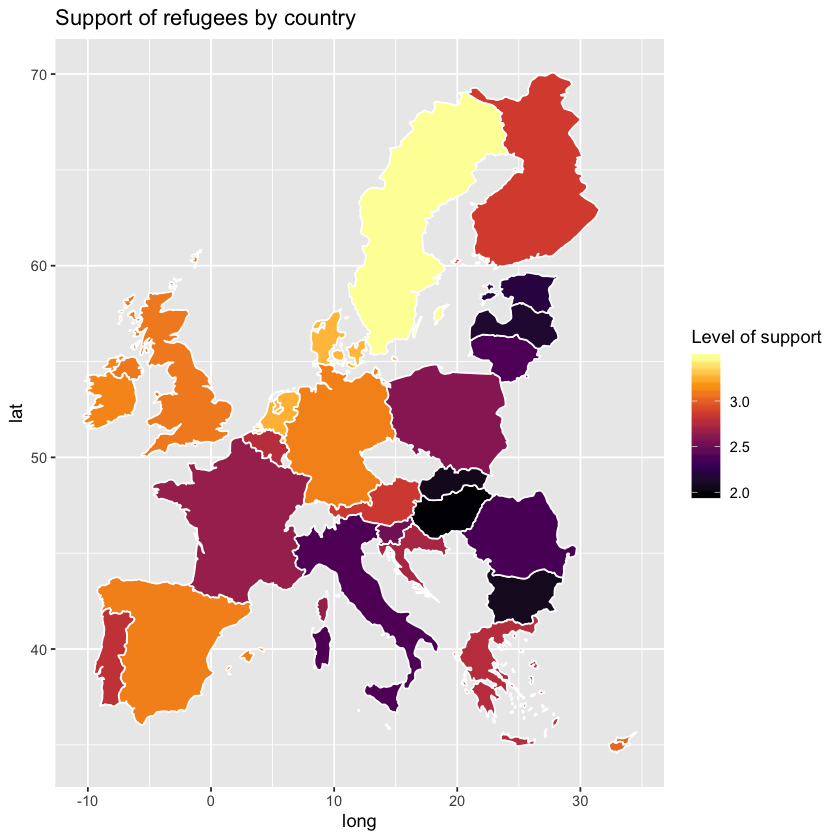

In [103]:
ggplot(support.map, aes(long, lat, group = group))+
  geom_polygon(aes(fill = mean_support_refugees), color = "white")+
  scale_fill_viridis_c(option = "B")+
  labs(title = "Support of refugees by country", fill = "Level of support")

### 8.3 Clustering and dimensionality reduction

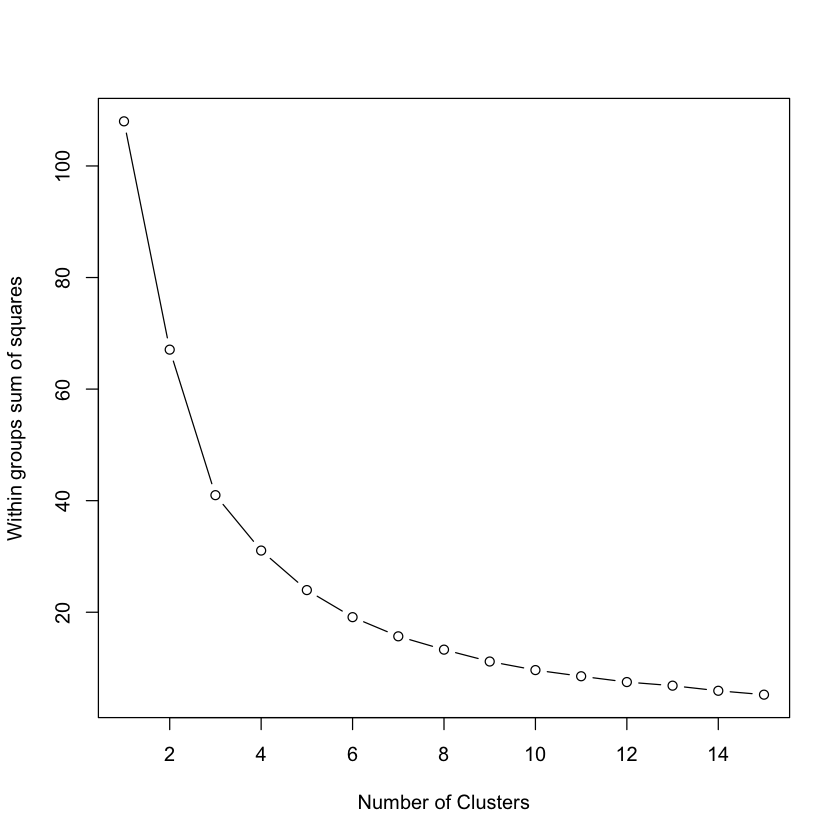

In [104]:
#select variables for matrix
#We get the average of each variable by country
d3 = d2%>%
  group_by(country)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE), 
            mean_support_migrants=mean(support_migrants_n, na.rm = TRUE),
            mean_age=mean(age, na.rm = TRUE),
            mean_educational=mean(educational_n, na.rm = TRUE))
d3 = d3 %>% column_to_rownames(., var = "country")
d3_s = scale(d3) # Scaling the data
# For 1 to 15 cluster centers
wss = 0
for (i in 1:15) {
  km.out <- kmeans(d3_s, centers = i, nstart = 25)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss }
# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

In [105]:
set.seed(123)
km.res <- kmeans(d3_s, 3, nstart = 25)
print(km.res)

K-means clustering with 3 clusters of sizes 12, 3, 13

Cluster means:
  mean_support_refugees mean_support_migrants    mean_age mean_educational
1             0.6497192             0.6287198 -0.02424197       -0.3834086
2             1.1883363             0.9988783  1.75318903        2.4510670
3            -0.8739722            -0.8108671 -0.38220489       -0.2117152

Clustering vector:
            UK         Sweden          Spain       Slovenia       Slovakia 
             1              2              1              3              3 
       Romania       Portugal         Poland    Netherlands          Malta 
             3              1              3              1              1 
     Luxemburg      Lithuania         Latvia          Italy        Ireland 
             1              3              3              3              1 
       Hungary         Greece        Germany         France        Finland 
             3              3              1              1              2 
  

Too few points to calculate an ellipse



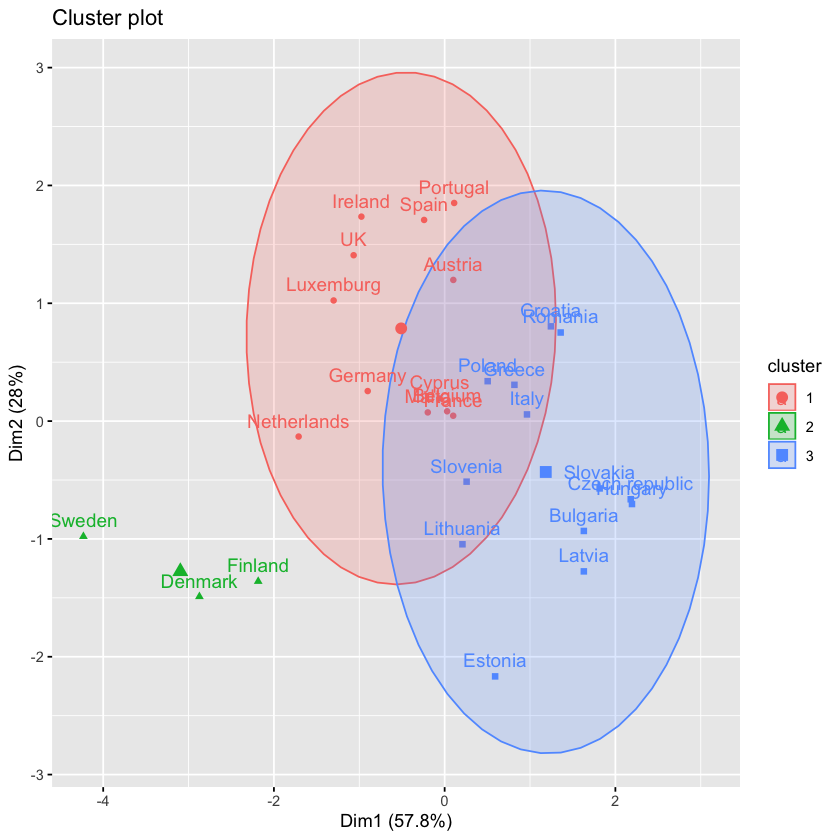

In [106]:
require(factoextra)
fviz_cluster(km.res, d3, ellipse.type = "norm")



In [107]:
# PAM clustering
#require(cluster)
#pam.res = pam(d3_s, 3)

In [108]:
hc.res <- hcut(d3_s, hc_method = "complete") #more methods: "average", "single", "centroid"
summary(hc.res)

            Length Class  Mode     
merge        54    -none- numeric  
height       27    -none- numeric  
order        28    -none- numeric  
labels       28    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      28    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          2    -none- numeric  
data        112    -none- numeric  

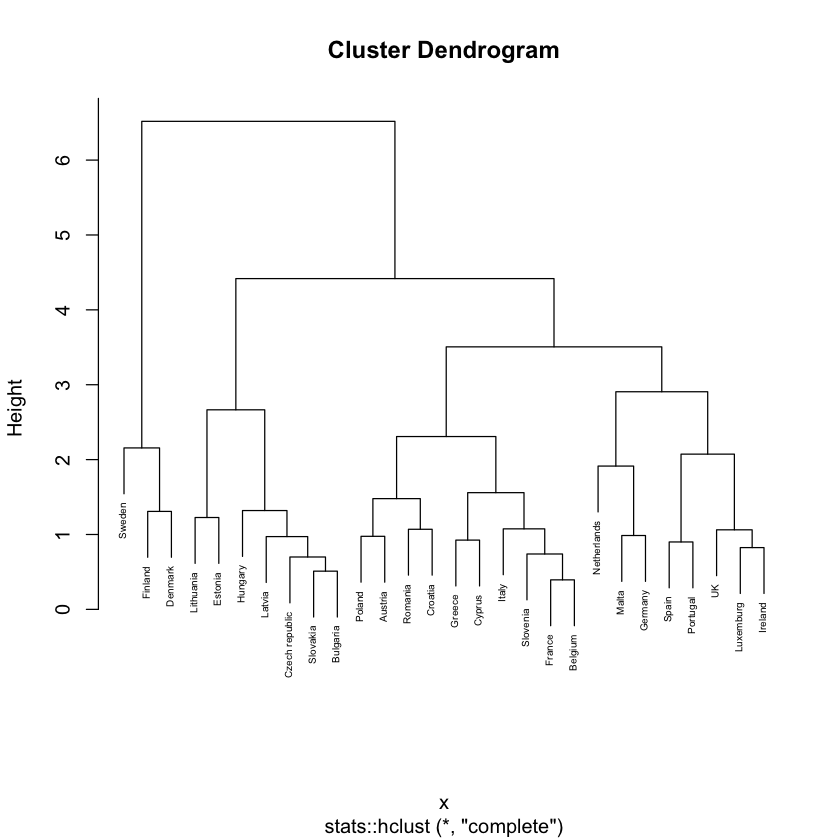

In [109]:
plot(hc.res, cex = 0.5)

In [110]:
hc.res <- hcut(d3_s, k = 3, hc_method = "complete") 
summary(hc.res)

            Length Class  Mode     
merge        54    -none- numeric  
height       27    -none- numeric  
order        28    -none- numeric  
labels       28    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      28    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          3    -none- numeric  
data        112    -none- numeric  

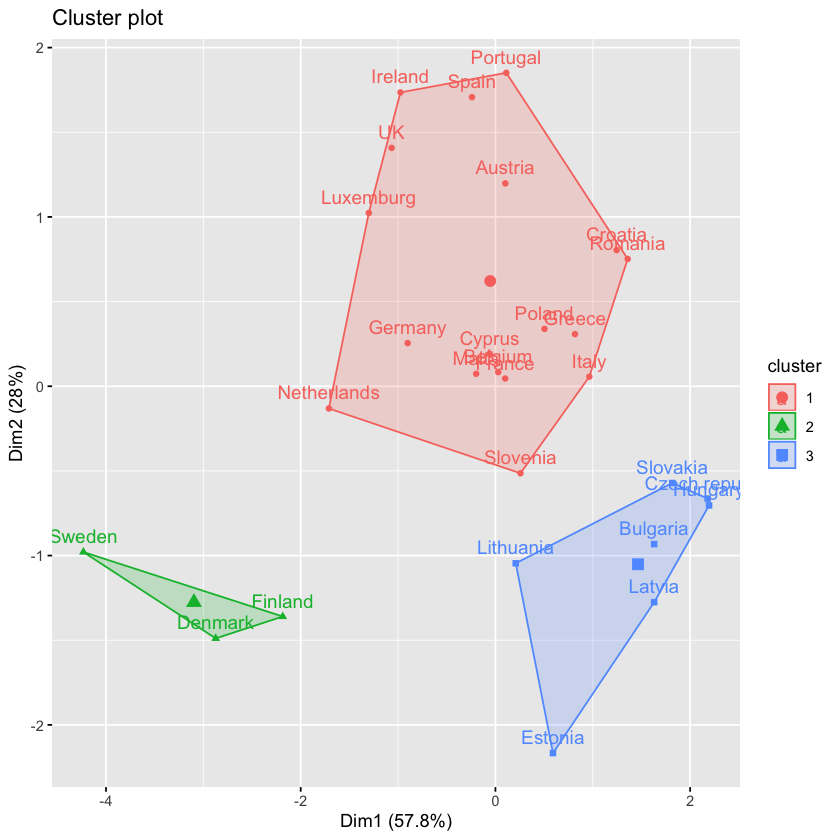

In [111]:
fviz_cluster(hc.res, d3_s, ellipse.type = "convex")

In [112]:
pca = prcomp(d3, scale = TRUE)
head(pca$x)
pca$rotation

,PC1,PC2,PC3,PC4
UK,-1.0661911,1.4077511,-0.3313378,0.3797768
Sweden,-4.2319376,-0.9790443,0.6620893,0.2057851
Spain,-0.2405747,1.7071834,-0.4979871,-0.1612669
Slovenia,0.2572706,-0.5139331,-0.1080992,0.1436441
Slovakia,1.8160653,-0.5714345,0.1970329,0.2913430
Romania,1.3588788,0.7518919,0.8306371,0.2312066


,PC1,PC2,PC3,PC4
mean_support_refugees,-0.5732924,0.3690096,-0.13985877,-0.71805799
mean_support_migrants,-0.5135857,0.5331396,0.09428317,0.66565948
mean_age,-0.4451170,-0.5586008,-0.67099390,0.19900549
mean_educational,-0.4576422,-0.5172613,0.72202312,-0.04107309


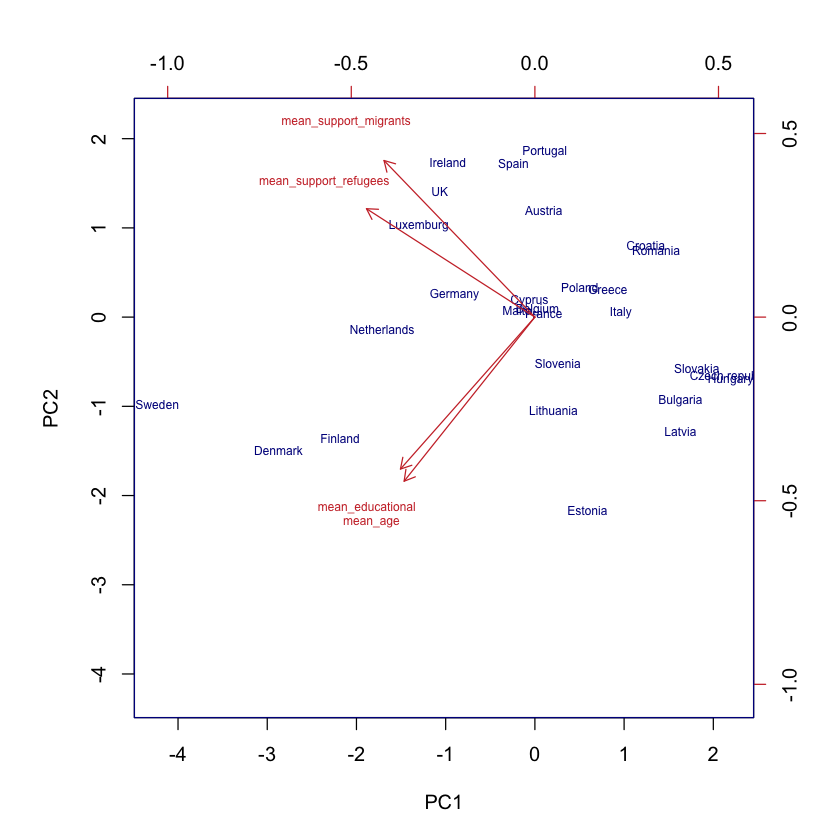

In [113]:
biplot(x = pca, scale = 0, cex = 0.6, col = c("blue4", "brown3"))

In [114]:
print("Proportion of variance explained:")
pca$sdev^2
prop_variance = pca$sdev^2 / sum(pca$sdev^2)
prop_variance

[1] "Proportion of variance explained:"


[1] 2.3139427 1.1189917 0.4137998 0.1532657

[1] 0.57848569 0.27974794 0.10344996 0.03831642

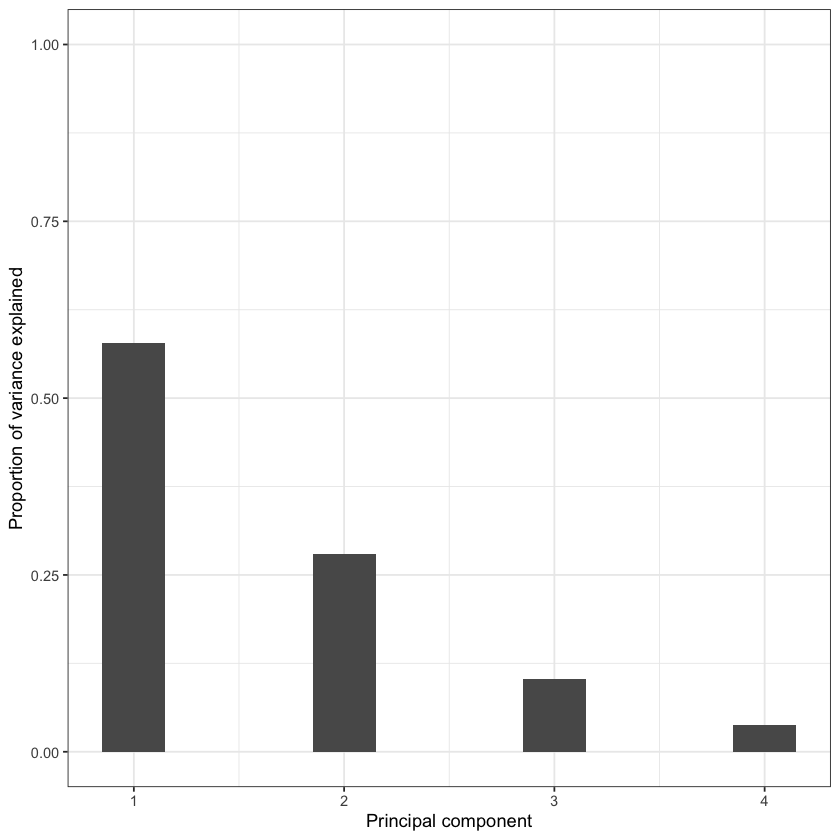

In [115]:
ggplot(data = data.frame(prop_variance, pc = 1:4),
       aes(x = pc, y = prop_variance)) +
  geom_col(width = 0.3) +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() +
  labs(x = "Principal component",
       y = "Proportion of variance explained")

In [116]:
print("Cumulative explained variance:")
prop_acum_variance = cumsum(prop_variance)
prop_acum_variance

[1] "Cumulative explained variance:"


[1] 0.5784857 0.8582336 0.9616836 1.0000000

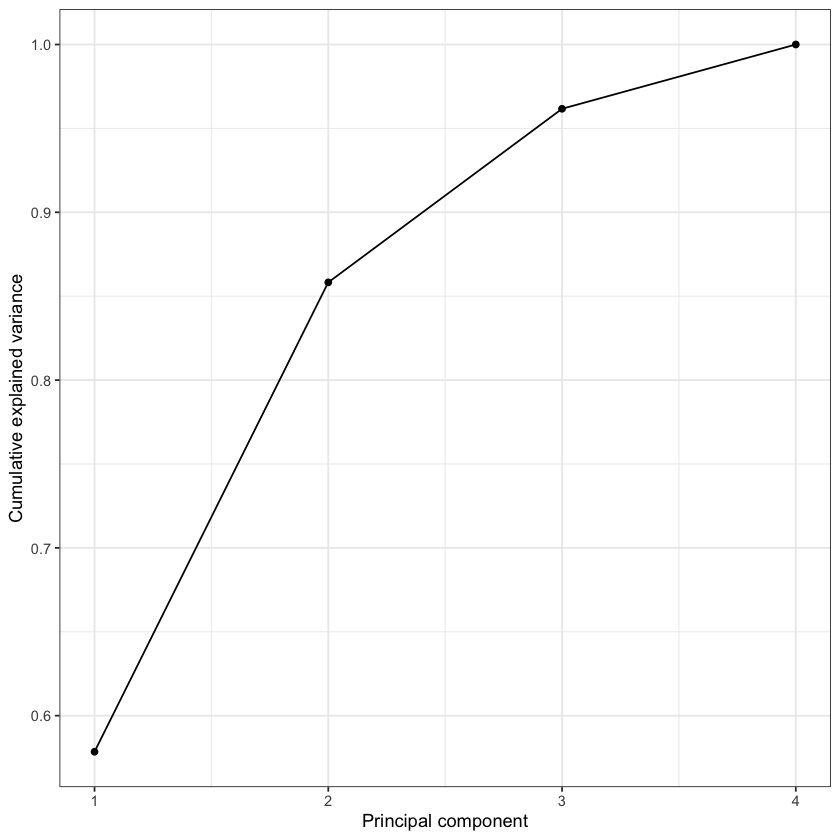

In [117]:
ggplot(data = data.frame(prop_acum_variance, pc = 1:4),
       aes(x = pc, y = prop_acum_variance, group = 1)) +
  geom_point() +
  geom_line() +
  theme_bw() +
  labs(x = "Principal component",
       y = "Cumulative explained variance")

,PC1,PC2
UK,-1.0661911,1.4077511
Sweden,-4.2319376,-0.9790443
Spain,-0.2405747,1.7071834
Slovenia,0.2572706,-0.5139331
Slovakia,1.8160653,-0.5714345
Romania,1.3588788,0.7518919


K-means clustering with 3 clusters of sizes 4, 12, 12

Cluster means:
         PC1        PC2
1 -2.7499003 -0.9898963
2 -0.3245781  0.8259759
3  1.2412116 -0.4960105

Clustering vector:
            UK         Sweden          Spain       Slovenia       Slovakia 
             2              1              2              3              3 
       Romania       Portugal         Poland    Netherlands          Malta 
             3              2              2              1              2 
     Luxemburg      Lithuania         Latvia          Italy        Ireland 
             2              3              3              3              2 
       Hungary         Greece        Germany         France        Finland 
             3              3              2              2              1 
       Estonia        Denmark Czech republic         Cyprus        Croatia 
             3              1              3              2              3 
      Bulgaria        Belgium        Austria 
        

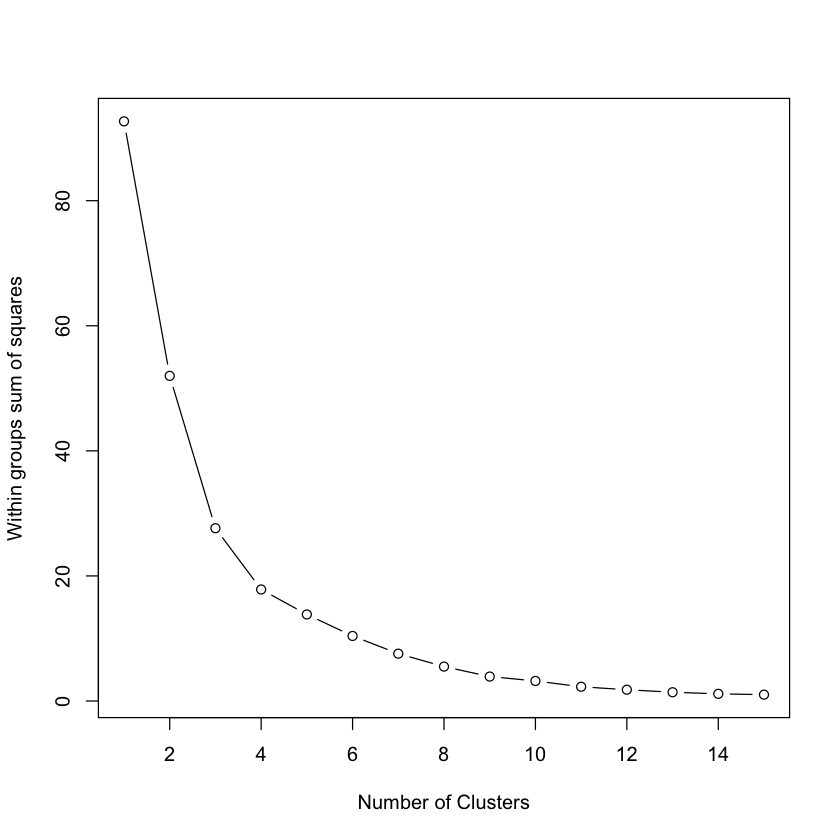

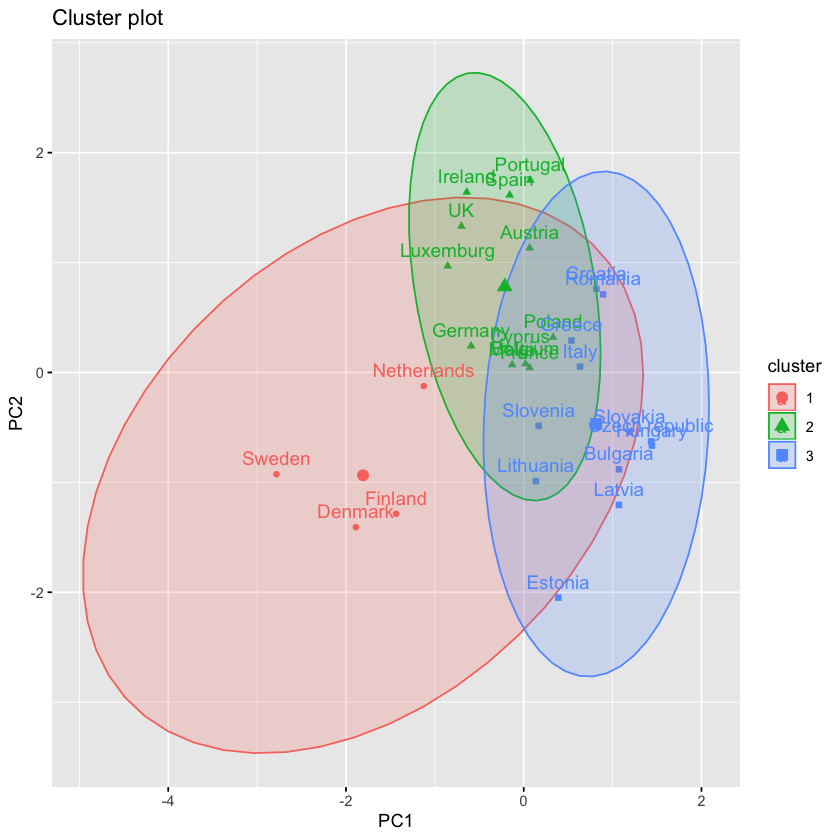

In [118]:
#Generate a new dataset with only two variables (PC1, PC2)
d5 = pca$x
d5 = subset(d5, TRUE, c(PC1, PC2))
head(d5)

#Get optimal number of clusters
wss_5 = 0
for (i in 1:15) {
  km.out_5 <- kmeans(d5, centers = i, nstart = 20)
  wss_5[i] <- km.out_5$tot.withinss }

plot(1:15, wss_5, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Compute again k-means with k = 3 and visualize the clusters
set.seed(123)
km.res_5 <- kmeans(d5, 3, nstart = 25)
print(km.res_5)
fviz_cluster(km.res_5, d5, ellipse.type = "norm")